# Module 6 - Clustering for Diverse portfolio analysis

   ### Welcome to the Answer notebook for Module 6 ! 
Make sure that you've submitted the module 5 notebook and unlocked Module 6 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 6.1 
Create a table/dataframe with the closing prices of 30 different stocks, with 10 from each of the caps

In [1]:
import os
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
caps = ["Large_Cap/Large_Cap",
        "Mid_Cap/Mid_Cap",
        "Small_Cap/Small_Cap"
        ]

dfs = {}
dailyValues = {}
annualValues = {}
for cap in caps:
    i=1
    for file_name in os.listdir('Data/'+f"{cap}"):        
        if fnmatch.fnmatch(file_name, '*.csv') and i<11:
            name = file_name.split('.')[0]
            dfs[name] = pd.read_csv(f'Data/{cap}/{file_name}')
            dfs[name] = dfs[name][dfs[name]["Series"] == "EQ"]   
            dfs[name].Date = pd.to_datetime(dfs[name]['Date'])
            dfs[name] = dfs[name].set_index('Date')
            dfs[name]["dailyChange"] = dfs[name]["Close Price"].pct_change()
            dfs[name].dropna(inplace = True)
            dailyValues[name] = [dfs[name].dailyChange.std(), dfs[name].dailyChange.mean()]
            annualValues[name] = [dailyValues[name][0]*(252**0.5), dailyValues[name][1]*252]
            i +=1

### Query 6.2
6.2 Calculate average annual percentage return and volatility of all 30 stocks over a theoretical one year period

In [3]:
print('(name, [std, mean])')
print('')
print('Daily - ')
for i in dailyValues.items():
    print(i)
print('')
print('Annual - ')    
for i in annualValues.items():
    print(i)

(name, [std, mean])

Daily - 
('HINDUNILVR', [0.012223439346257617, 0.0011880080922045063])
('HDFCBANK', [0.009464714725062067, 0.0008297013969638806])
('ASIANPAINT', [0.013194849833696072, 0.0003888475213985988])
('EICHERMOT', [0.018909798917251173, -0.0007003338366123908])
('M&M', [0.02775327134537185, -0.0010809563078841245])
('AXISBANK', [0.01750714774825731, 0.0009253742541607662])
('ADANIPORTS', [0.01951245469630954, 0.00024007341911916127])
('TITAN', [0.020462722337194247, 0.0019507646319857656])
('BAJFINANCE', [0.020224782580317745, 0.0018029055588609634])
('IOC', [0.03149993017502295, -0.0016416719971549393])
('MINDTREE', [0.02151154178820467, 0.0015578165636875021])
('NBCC', [0.032043350400791856, -0.0020443492594053167])
('VOLTAS', [0.01942400288315044, 0.0007580562036287222])
('IGL', [0.040858264567022316, -0.0006289856988267083])
('IDBI', [0.028585912277962398, -0.0011746359609724713])
('RELINFRA', [0.03449402256772038, -0.0029764831692829182])
('CASTROLIND', [0.0281301536

### Query 6.3
6.3 Cluster the 30 stocks according to their mean annual Volatilities and Returns using K-means clustering. Identify the optimum number of clusters using the Elbow curve method

In [4]:
data = pd.DataFrame.from_dict(annualValues, orient='index', columns=["std", "mean"])

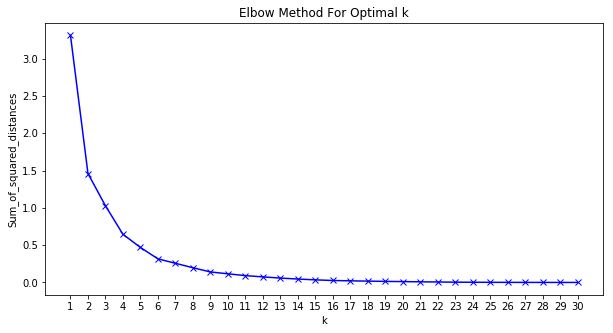

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
mms = MinMaxScaler()
mms.fit(data)
transformedData = mms.transform(data)
Sum_of_squared_distances = []
K = range(1, 31)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(transformedData)
    Sum_of_squared_distances.append(km.inertia_)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(K, Sum_of_squared_distances, 'bx-')
plt.xticks(K)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Query 6.4
6.4 Prepare a separate Data frame to show which stocks belong to the same cluster 

In [6]:
# Using k=6
k=6
km = KMeans(n_clusters=k)
km = km.fit(transformedData)

In [7]:
data['labels'] = km.labels_
centers = km.cluster_centers_
y_kmeans = km.predict(transformedData)

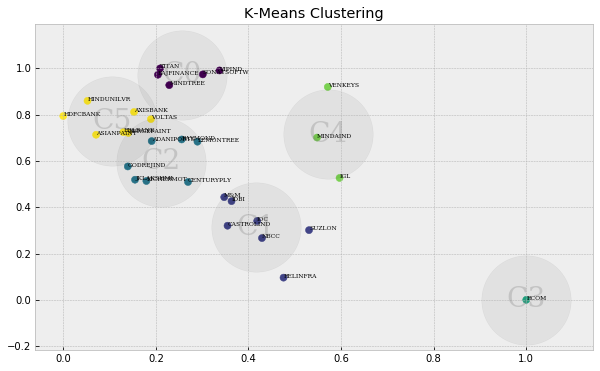

In [8]:
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(transformedData[:, 0], transformedData[:, 1], c=y_kmeans, s=50, cmap='viridis')
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=8000, alpha=0.05)
font = {'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 6}
for x, y, name in zip(transformedData[:, 0], transformedData[:, 1], data.index):
    ax.text(x, y, name, fontdict=font,rotation=0)
font = {'family': 'serif', 'color':  'gray', 'weight': 'normal', 'size': 28}
for i, cord in enumerate(centers):
    ax.text(cord[0], cord[1], f"C{i}",horizontalalignment='center',verticalalignment='center', fontdict=font, rotation=0, alpha=0.3)
plt.title('K-Means Clustering')
plt.show()